In [2]:
import pickle
import numpy as np
import rewardpredictive as rp
import rlutils as rl
import matplotlib.pyplot as plt
from pathlib import Path
from rewardpredictive.mdp import RandomRewardChange, mdp_goal_dist, FixedTerminalRewardChange

from matplotlib import rc
rc('font', **{'family': 'serif', 'size': 16})
rc('text', usetex=True)

from definitions import ROOT_DIR

results_directory = 'SingleChangeMaze/1_goal_0_state_lower'
# title = u'$L1 > 10$'
title = u'$L1 > 10$'

ql = rp.ExperimentSetTaskSequenceRandomRewardChangeQLearning.load(base_dir=f'./data/{results_directory}')
qt = rp.ExperimentSetTaskSequenceRandomRewardChangeQTransfer.load(base_dir=f'./data/{results_directory}')
# sfl = rp.ExperimentSetTaskSequenceRandomRewardChangeSFLearning.load(base_dir=f'./data/{results_directory}')
sft = rp.ExperimentSetTaskSequenceRandomRewardChangeSFTransfer.load(base_dir=f'./data/{results_directory}') 
sfta = rp.ExperimentSetTaskSequenceRandomRewardChangeSFTransferAll.load(base_dir=f'./data/{results_directory}')


In [3]:
# FILTERING
# for sf in [sfl, sft, sfta]:
#     new_experiment_list = []
#     for i, exp in enumerate(sf.experiment_list):
#         if exp.hparam['lr_r'] <= 0.5 and exp.hparam['lr_sf'] <= 0.5:
#             new_experiment_list.append(exp)
#     sf.experiment_list = new_experiment_list

# for q in [ql, qt]:
#     new_experiment_list = []

#     for i, exp in enumerate(q.experiment_list):
#         if exp.hparam['lr'] <= 0.5:
#             new_experiment_list.append(exp)
#     q.experiment_list = new_experiment_list


In [4]:
metric = 'avg_reward'  # NOTE! This is labeled incorrectly - it should be TOTAL reward.
print('Q-learning')
exp_ql = ql.get_best_experiment(exploration='egreedy', task_sequence='significant', metric=metric, better='max') 
print('Q-learning with Q-value transfer')
exp_qt = qt.get_best_experiment(exploration='egreedy', task_sequence='significant', metric=metric, better='max')  
print('SF-transfer')
exp_sft = sft.get_best_experiment(exploration='egreedy', task_sequence='significant', metric=metric, better='max')  
# print('SF-learning')
# exp_sfl = sfl.get_best_experiment(exploration='egreedy', task_sequence='significant', metric=metric, better='max')  
print('SF-learning with SF and rew transfer')
exp_sfta = sfta.get_best_experiment(exploration='egreedy', task_sequence='significant', metric=metric, better='max')  

# Set up some preliminary variables used for plotting
episodes_per_task = exp_ql.results['episode_length'][0].shape[-1]
runs_per_task = len(exp_ql.results['episode_length'])
num_tasks = exp_ql.results['episode_length'][0].shape[0]
tasks = np.arange(num_tasks)

Q-learning
repeats: 30
task_sequence: significant
exploration: egreedy
episodes: 200
epsilon: 0.1
gamma: 0.99
mdp_size: 8
num_tasks: 2
lr: 0.1
change_maze_per_run: True
Q-learning with Q-value transfer
repeats: 30
task_sequence: significant
exploration: egreedy
episodes: 200
epsilon: 0.1
gamma: 0.99
mdp_size: 8
num_tasks: 2
lr: 0.9
change_maze_per_run: True
SF-transfer
repeats: 30
task_sequence: significant
exploration: egreedy
episodes: 200
epsilon: 0.1
gamma: 0.99
mdp_size: 8
num_tasks: 2
lr_sf: 0.1
lr_r: 0.3
change_maze_per_run: True
SF-learning with SF and rew transfer
repeats: 30
task_sequence: significant
exploration: egreedy
episodes: 200
epsilon: 0.1
gamma: 0.99
mdp_size: 8
num_tasks: 2
lr_sf: 0.5
lr_r: 0.9
change_maze_per_run: True


array([[[0.        , 0.        , 0.        , ..., 0.96059601,
         0.96059601, 0.96059601],
        [0.        , 0.        , 0.        , ..., 0.88638487,
         0.90438208, 0.86874581]],

       [[0.        , 0.        , 0.        , ..., 0.88638487,
         0.88638487, 0.90438208],
        [0.        , 0.        , 0.48989027, ..., 0.96059601,
         0.96059601, 0.96059601]],

       [[0.        , 0.        , 0.        , ..., 0.92274469,
         0.92274469, 0.92274469],
        [0.        , 0.        , 0.        , ..., 0.96059601,
         0.96059601, 0.96059601]],

       ...,

       [[0.        , 0.6426116 , 0.        , ..., 0.96059601,
         0.96059601, 0.96059601],
        [0.        , 0.        , 0.        , ..., 0.92274469,
         0.91351725, 0.91351725]],

       [[0.92274469, 0.        , 0.        , ..., 0.96059601,
         0.94148015, 0.94148015],
        [0.        , 0.        , 0.        , ..., 0.92274469,
         0.92274469, 0.92274469]],

       [[0.      

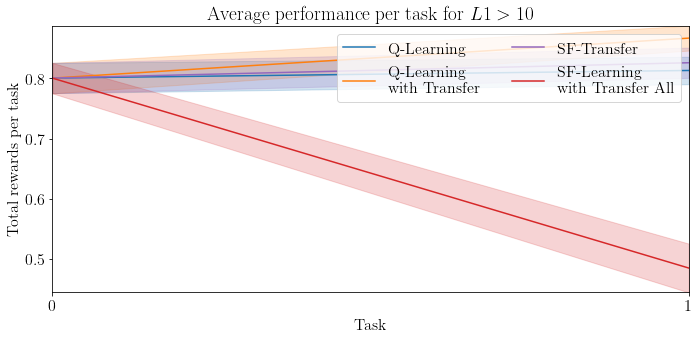

In [5]:
total_reward_qlearning = np.mean(np.array(exp_ql.results[metric]), axis=-1) 
total_reward_qtransfer = np.mean(np.array(exp_qt.results[metric]), axis=-1)
# total_reward_sflearning = np.mean(np.array(exp_sfl.results[metric]), axis=-1)
total_reward_sftransfer = np.mean(np.array(exp_sft.results[metric]), axis=-1)
total_reward_sftransferall = np.mean(np.array(exp_sfta.results[metric]), axis=-1)

plt.figure(figsize=(10, 5))

rl.plot.mean_with_sem(tasks, total_reward_qlearning, axis=0, color='C0', label='Q-Learning')
rl.plot.mean_with_sem(tasks, total_reward_qtransfer, axis=0, color='C1', label='Q-Learning\nwith Transfer')
# rl.plot.mean_with_sem(tasks, total_reward_sflearning, axis=0, color='C2', label='SF-Learning')
rl.plot.mean_with_sem(tasks, total_reward_sftransfer, axis=0, color='C4', label='SF-Transfer')
rl.plot.mean_with_sem(tasks, total_reward_sftransferall, axis=0, color='C3', label='SF-Learning\nwith Transfer All')

_, _, y_bottom, y_top = plt.axis()
# for i in tasks[1:]:
#     plt.plot([i, i], [y_bottom, y_top], c='k', alpha=0.1)
#     plt.text(i - 0.32, y_top - 275, all_distances[i], alpha=0.6)
# plt.ylim([10, 35])

def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

plt.title(f'Average performance per task for {title}')
plt.ylabel('Total rewards per task')
plt.xlabel('Task')
plt.xticks(tasks)
leg = plt.legend(loc=1, ncol=2, frameon=True)
# export_legend(leg)
plt.margins(x=0)
plt.margins(y=0)
# leg.get_frame().set_linewidth(0.0)
plt.tight_layout()
filehead = results_directory.replace('/', '_')
plt.savefig(f'figure/{filehead}_simple.svg', bbox_inches='tight', pad_inches=0.1, transparent=True)

In [7]:
from scipy.stats import sem, ttest_ind
delta_q = total_reward_qlearning[:, -1] - total_reward_qtransfer[:, -1]
delta_sf = total_reward_sftransfer[:, -1] - total_reward_sftransferall[:, -1]

target = delta_q
_, p = ttest_ind(delta_sf, target, equal_var=False)

{
    "delta-Q": {
        "mean": delta_q.mean(),
        "std_err": sem(delta_q),
        "p-value": 1.0,
    },
    "delta-SF": {
        "mean": delta_sf.mean(),
        "std_err": sem(delta_sf),
        "p-value": p,
    }
}

{'delta-Q': {'mean': -0.05366666666666668,
  'std_err': 0.020678065080633808,
  'p-value': 1.0},
 'delta-SF': {'mean': 0.3404999999999999,
  'std_err': 0.033089351344711984,
  'p-value': 1.557104622558639e-13}}

In [9]:
from scipy.stats import sem, ttest_ind
{
    "Q-Learning": {
        'mean': total_reward_qlearning[:, -1].mean(),
        'std_err': sem(total_reward_qlearning[:, -1])
    },
    "Q-Transfer": {
        'mean': total_reward_qtransfer[:, -1].mean(),
        'std_err': sem(total_reward_qtransfer[:, -1])
    },
    "SF-Transfer": {
        'mean': total_reward_sftransfer[:, -1].mean(),
        'std_err': sem(total_reward_sftransfer[:, -1])
    },
#     "SF-Learning": {
#         'mean': total_reward_sflearning[:, -1].mean(),
#         'std_err': sem(total_reward_sflearning[:, -1])
#     },
    "SF-TransferAll": {
        'mean': total_reward_sftransferall[:, -1].mean(),
        'std_err': sem(total_reward_sftransferall[:, -1])
    },
}

{'Q-Learning': {'mean': 0.8128333333333333, 'std_err': 0.022777892252772797},
 'Q-Transfer': {'mean': 0.8664999999999999, 'std_err': 0.020703364710713754},
 'SF-Transfer': {'mean': 0.8256666666666667, 'std_err': 0.025070857438873256},
 'SF-TransferAll': {'mean': 0.4851666666666667,
  'std_err': 0.04052137461595156}}

In [11]:
target = total_reward_sftransfer[:, -1]
test_results = {}
all_totals = {
    'Q-Learning': total_reward_qlearning[:, -1],
    'Q-Transfer': total_reward_qtransfer[:, -1],
    'SF-Transfer': total_reward_sftransfer[:, -1],
#     'SF-Learning': total_reward_sflearning[:, -1],
    'SF-TransferAll': total_reward_sftransferall[:, -1]
}
for key, res in all_totals.items():
    _, p = ttest_ind(res, target, equal_var=False)
    test_results[key] = {
        'mean': res.mean(),
        'std_err': sem(res),
        'p': p
    }
test_results

{'Q-Learning': {'mean': 0.8128333333333333,
  'std_err': 0.022777892252772797,
  'p': 0.7061832965594359},
 'Q-Transfer': {'mean': 0.8664999999999999,
  'std_err': 0.020703364710713754,
  'p': 0.2143818034879072},
 'SF-Transfer': {'mean': 0.8256666666666667,
  'std_err': 0.025070857438873256,
  'p': 1.0},
 'SF-TransferAll': {'mean': 0.4851666666666667,
  'std_err': 0.04052137461595156,
  'p': 4.22404152785681e-09}}

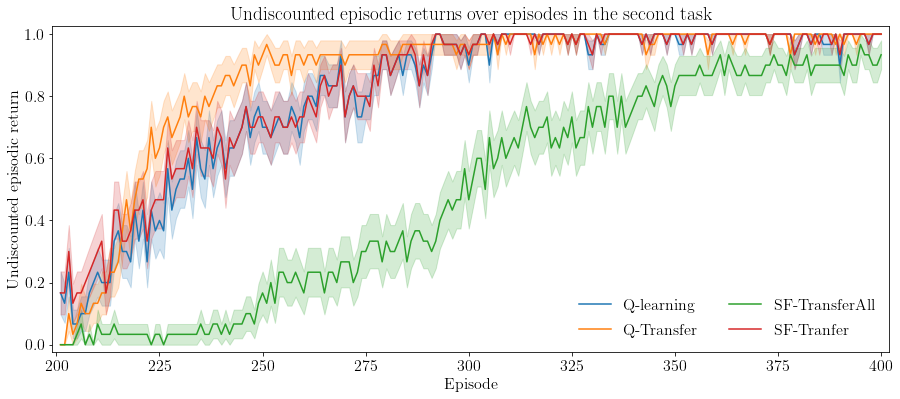

In [12]:
def mean_with_sem(xvals, yvals, axis=0, color='C0', label=None):  # pragma: no cover
    import matplotlib.pyplot as plt # Must be imported on use, otherwise matplotlib may open a UI window.

    yvals_m = np.mean(yvals, axis=axis)
#     yvals_m = smooth(yvals_m, 10)
    yvals_m = yvals_m

    yvals_e = sem(yvals, axis=axis)
    plt.plot(xvals, yvals_m, c=color, label=label)
    plt.fill_between(xvals, y1=yvals_m + yvals_e, y2=yvals_m - yvals_e, color=color, alpha=0.2)

y_lim = 1.025

plt.figure(figsize=(15, 6))

# total_reward_ql = (np.array(exp_ql.results[metric]) * np.power(0.99, np.array(exp_ql.results['episode_length']))).transpose([1, 0, 2])
# total_reward_qt = (np.array(exp_qt.results[metric]) * np.power(0.99, np.array(exp_qt.results['episode_length']))).transpose([1, 0, 2])
# total_reward_sfl = (np.array(exp_sfl.results[metric]) * np.power(0.99, np.array(exp_sfl.results['episode_length']))).transpose([1, 0, 2])
# total_reward_sft = (np.array(exp_sft.results[metric]) * np.power(0.99, np.array(exp_sft.results['episode_length']))).transpose([1, 0, 2])
# total_reward_sfta = (np.array(exp_sfta.results[metric]) * np.power(0.99, np.array(exp_sfta.results['episode_length']))).transpose([1, 0, 2])


total_reward_ql = np.array(exp_ql.results[metric]).transpose([1, 0, 2])
total_reward_qt = np.array(exp_qt.results[metric]).transpose([1, 0, 2])
# total_reward_sfl = np.array(exp_sfl.results[metric]).transpose([1, 0, 2])
total_reward_sft = np.array(exp_sft.results[metric]).transpose([1, 0, 2])
total_reward_sfta = np.array(exp_sfta.results[metric]).transpose([1, 0, 2])
ep_idx = np.arange(200) + 1

# exp_names = ["Q-learning", "Q-Transfer", "SF-Learning",  "SF-TransferAll", "SF-Tranfer"]
exp_names = ["Q-learning", "Q-Transfer", "SF-TransferAll", "SF-Tranfer"]

# for j, ep in enumerate([total_reward_ql, total_reward_qt, total_reward_sfl, total_reward_sfta, total_reward_sft]):
for j, ep in enumerate([total_reward_ql, total_reward_qt, total_reward_sfta, total_reward_sft]):

#     for i, ep_len in enumerate(ep):
    mean_with_sem(ep_idx + 200, ep[-1], axis=0, color=f'C{j}', label=exp_names[j])
        
_, _, y_bottom, y_top = plt.axis()


plt.xlabel('Episode')
plt.ylabel('Undiscounted episodic return')
plt.ylim([-0.025, y_lim])
plt.margins(x=0.01)
plt.margins(y=0)
plt.title(f'Undiscounted episodic returns over episodes in the second task')
leg = plt.legend(loc="best", ncol=2, frameon=False)
# leg.get_frame().set_linewidth(0.0)
plt.savefig(f'figure/{filehead}_finegrained.svg', bbox_inches='tight', pad_inches=.1, transparent=True)

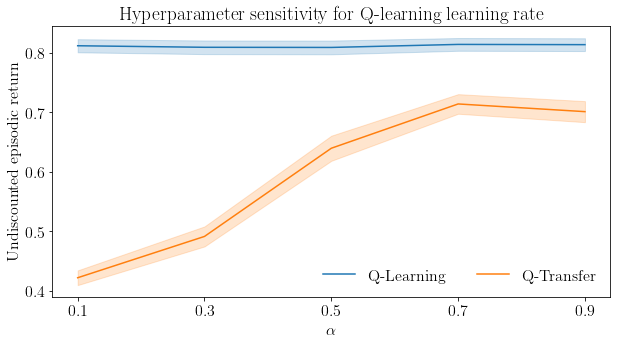

In [45]:
# HYPERPARAMETER SENSITIVITY PLOTS
hyperparam = "lr"
hparam_title = "Q-learning learning rate"

def get_hp_results(exp_set, hyperparam, metric):
    variants = []
    full_results = []
    averages = []
    for exp in exp_set.experiment_list:
        variants.append(exp.hparam[hyperparam])
        data = np.array(exp.results[metric])
        full_results.append(data)
        averages.append(np.average(data, axis=(-2, -1)))
    
    return variants, averages, full_results

variants, ql_averages, _ = get_hp_results(ql, hyperparam, metric)
_, qt_averages, _ = get_hp_results(qt, hyperparam, metric)


plt.figure(figsize=(10, 5))
rl.plot.mean_with_sem(variants, ql_averages, axis=1, color='C0', label='Q-Learning')
rl.plot.mean_with_sem(variants, qt_averages, axis=1, color='C1', label='Q-Transfer')
# # rl.plot.mean_with_sem(variants, sft_averages, axis=0, color='C2', label='SF-Transfer')
# # rl.plot.mean_with_sem(variants, sfl_averages, axis=0, color='C3', label='SF-Learning')
# # rl.plot.mean_with_sem(variants, sfta_averages, axis=0, color='C4', label='SF-Learning\nwith Transfer All')

# plt.ylim([10, 35])
plt.title(f'Hyperparameter sensitivity for {hparam_title}')
plt.ylabel('Undiscounted episodic return')
plt.xlabel(r'$\alpha$')
plt.xticks(variants)
leg = plt.legend(loc="best", ncol=2, frameon=False)
leg.get_frame().set_linewidth(0.0)
plt.savefig(f'figure/hyperparam_sensitivity_{filehead}_{hparam_title}.svg', bbox_inches='tight', pad_inches=.1, transparent=True)

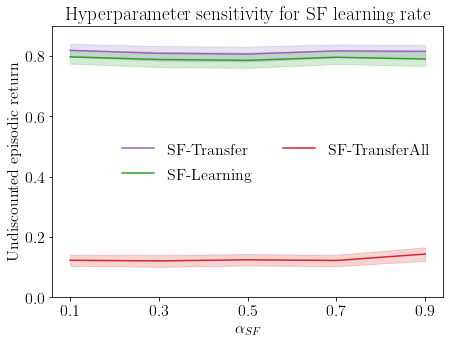

In [46]:
hyperparam = "lr_sf"
hparam_title = "SF learning rate"

def get_grouped_hp_results(exp_set, hyperparam, metric):
    full_results = {}
    grouped_averages = {}
    for exp in exp_set.experiment_list:
        hypp = exp.hparam[hyperparam]
        if hypp not in full_results:
            full_results[hypp] = []
            grouped_averages[hypp] = []
        data = np.array(exp.results[metric])
        full_results[hypp].append(data)
        # We only use second task
        grouped_averages[hypp].append(np.average(data[:, -1], axis=-1))
    
    for key, value in grouped_averages.items():
        grouped_averages[key] = np.average(value, axis=0)
    
    return full_results, grouped_averages

_, sft_averages = get_grouped_hp_results(sft, hyperparam, metric)
_, sfl_averages = get_grouped_hp_results(sfl, hyperparam, metric)
_, sfta_averages = get_grouped_hp_results(sfta, hyperparam, metric)
plt.figure(figsize=(7, 5))

rl.plot.mean_with_sem(list(sft_averages.keys()), list(sft_averages.values()), axis=1, color='C4', label='SF-Transfer')
rl.plot.mean_with_sem(list(sfl_averages.keys()), list(sfl_averages.values()), axis=1, color='C2', label='SF-Learning')
rl.plot.mean_with_sem(list(sfta_averages.keys()), list(sfta_averages.values()), axis=1, color='C3', label='SF-TransferAll')

plt.ylim([0, 0.9])
hp = hyperparam.replace('_', '-')
plt.title(f'Hyperparameter sensitivity for {hparam_title}')
plt.ylabel('Undiscounted episodic return')
plt.xlabel(r'$\alpha_{SF}$')
plt.xticks(variants)
leg = plt.legend(loc="best", ncol=2, frameon=False)
leg.get_frame().set_linewidth(0.0)
plt.savefig(f'figure/hyperparam_sensitivity_{filehead}_{hparam_title}.svg', bbox_inches='tight', pad_inches=.1, transparent=True)


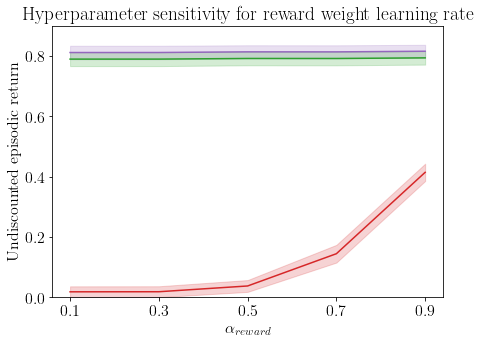

In [47]:
hyperparam = "lr_r"
hparam_title = "reward weight learning rate"

def get_grouped_hp_results(exp_set, hyperparam, metric):
    full_results = {}
    grouped_averages = {}
    for exp in exp_set.experiment_list:
        hypp = exp.hparam[hyperparam]
        if hypp not in full_results:
            full_results[hypp] = []
            grouped_averages[hypp] = []
        data = np.array(exp.results[metric])
        full_results[hypp].append(data)
        # We only use second task
        grouped_averages[hypp].append(np.average(data[:, -1], axis=-1))
    
    for key, value in grouped_averages.items():
        grouped_averages[key] = np.average(value, axis=0)
    
    return full_results, grouped_averages

_, sft_averages = get_grouped_hp_results(sft, hyperparam, metric)
_, sfl_averages = get_grouped_hp_results(sfl, hyperparam, metric)
_, sfta_averages = get_grouped_hp_results(sfta, hyperparam, metric)
plt.figure(figsize=(7, 5))

rl.plot.mean_with_sem(list(sft_averages.keys()), list(sft_averages.values()), axis=1, color='C4', label='SF-Transfer')
rl.plot.mean_with_sem(list(sfl_averages.keys()), list(sfl_averages.values()), axis=1, color='C2', label='SF-Learning')
rl.plot.mean_with_sem(list(sfta_averages.keys()), list(sfta_averages.values()), axis=1, color='C3', label='SF-TransferAll')

plt.ylim([0, 0.9])
hp = hyperparam.replace('_', '-')
plt.title(f'Hyperparameter sensitivity for {hparam_title}')
plt.ylabel('Undiscounted episodic return')
plt.xlabel(r'$\alpha_{reward}$')
plt.xticks(variants)
# leg = plt.legend(loc="best", ncol=2, frameon=False)
# leg.get_frame().set_linewidth(0.0)
plt.savefig(f'figure/hyperparam_sensitivity_{filehead}_{hparam_title}.svg', bbox_inches='tight', pad_inches=.1, transparent=True)


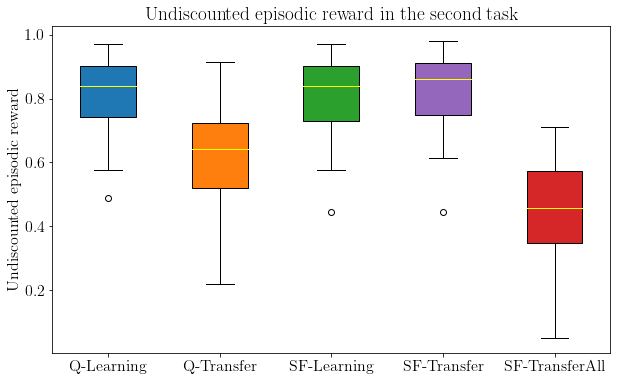

In [70]:
plt.figure(figsize=(10, 6))
total_rew_list = []
label_list = []
plots_keys_colors = [
    ('Q-Learning', all_totals['Q-Learning'], 0),
    ('Q-Transfer', all_totals['Q-Transfer'], 1),
    ('SF-Learning', all_totals['SF-Learning'], 2),
    ('SF-Transfer', all_totals['SF-Transfer'], 4),
    ('SF-TransferAll', all_totals['SF-TransferAll'], 3),

]
for key, value, _ in plots_keys_colors:
    total_rew_list.append(value)
    label_list.append(key)

bplot = plt.boxplot(total_rew_list, positions=range(len(label_list)), patch_artist=True)

# Color the boxes!
for (_, _, c_idx), patch, median in zip(plots_keys_colors, bplot['boxes'], bplot['medians']):
#     patch.set(color=f'C{c_idx}')
    patch.set(facecolor=f'C{c_idx}')
    median.set(color='yellow')
    

plt.xticks(range(len(label_list)), label_list)
plt.ylabel('Undiscounted episodic reward')
# # plt.ylim([8, 27])
plt.title("Undiscounted episodic reward in the second task")
plt.savefig(f'figure/{filehead}_box_plot.svg', bbox_inches='tight', pad_inches=.1, transparent=True)

In [61]:
bplot

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4fb357130>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4fb357a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4fb3b8100>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff4fb3631c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4fb3b80a0>,
 'means': []}